In [1]:
from utils import *

## Logistic Regression

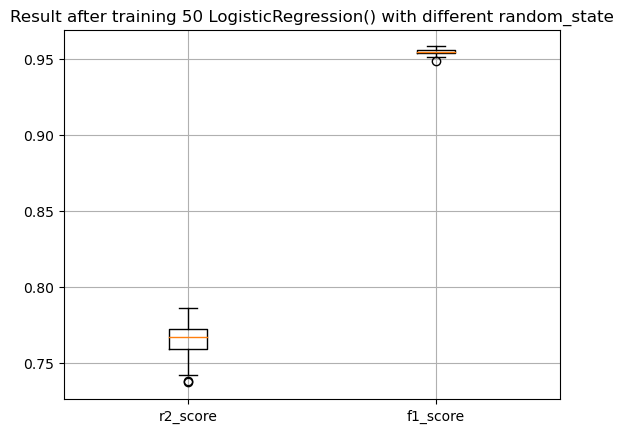

In [2]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
value = multi_test(logistic_model,X=X,Y=Y,n=50)

In [3]:
submit_logistic = submission(LogisticRegression(),name_file="Submissions/logistic_submission.csv")

Grid Search Progress: 100%|██████████| 72/72 [45:53<00:00, 38.25s/it]

LogisticRegression(C=10, max_iter=500, n_jobs=6, random_state=42, tol=1e-05)


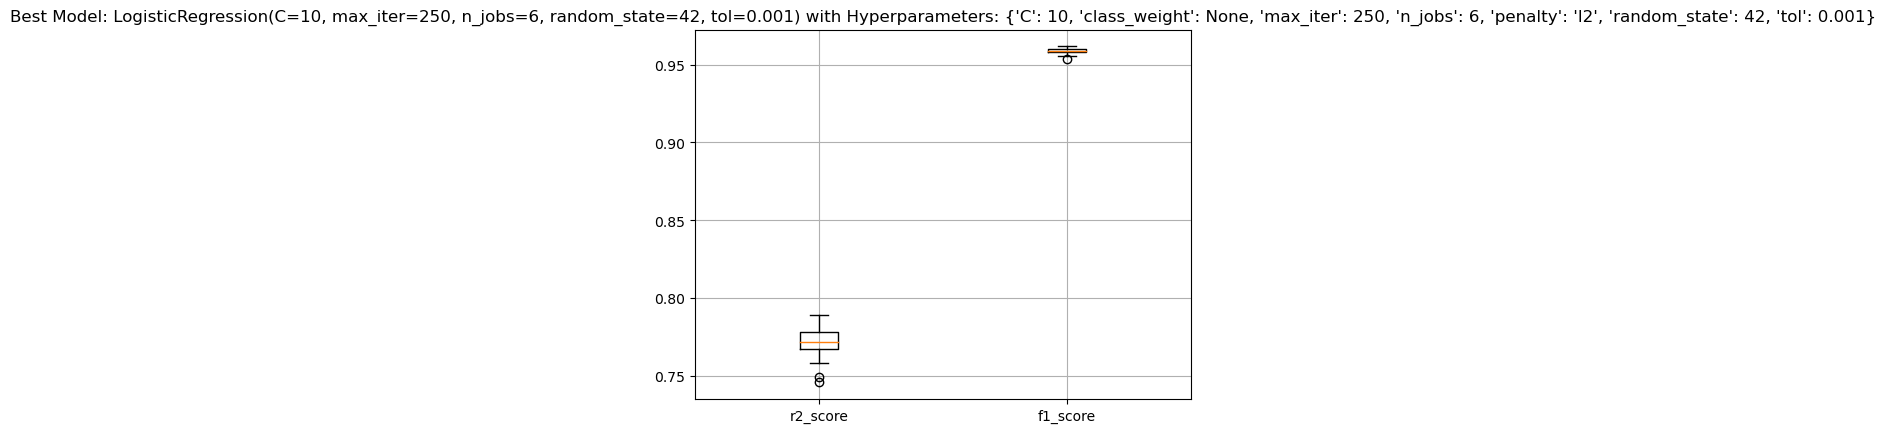

Best hyperparameters: {'C': 10, 'class_weight': None, 'max_iter': 250, 'n_jobs': 6, 'penalty': 'l2', 'random_state': 42, 'tol': 0.001}
Best score (f1_score): 0.9586383247009652


In [4]:
hyperparameters = {
    "penalty": [ "l2"],
    'C': [0.01, 0.1, 1, 10],
    'class_weight': ['balanced', None],
    'max_iter': [100,250,500],
    'tol': [1e-3,1e-4, 1e-5],
    "n_jobs":[nb_cpu//2],
    "random_state":[random_seed],
}

logistic_model = LogisticRegression()

best_model_logistic, best_params_logistic, best_score_logistic, all_results_logistic = grid_search(
    logistic_model, X, Y, hyperparameters, n=25, random_start= 42,
    saving_path="Archives_Model/Logistic_Regression/grid_best_model.joblib" ,display_boxplot=True)

In [5]:
submit_best_logistic = submission(best_model_logistic,name_file="Submissions/best_logistic_submission.csv")

### K_Neighbors Classifier

Grid Search Progress: 100%|██████████| 96/96 [44:51<00:00, 28.04s/it]

KNeighborsClassifier(leaf_size=40, n_jobs=8, n_neighbors=60, p=3,
                     weights='distance')


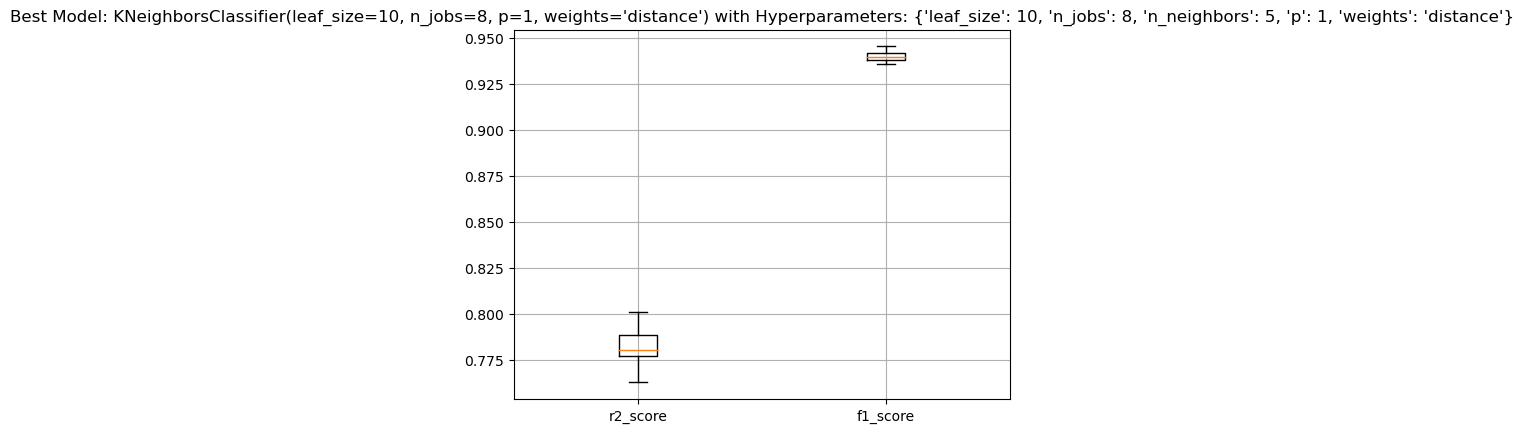

Best hyperparameters: {'leaf_size': 10, 'n_jobs': 8, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best score (f1_score): 0.9398179033362735


In [6]:
hyperparameters = {
    "weights": [ "uniform",'distance'],
    'p': [ 1,2,3],
    'n_neighbors': [5,15,30,60],
    'leaf_size': [10,20,30,40],
    "n_jobs" : [nb_cpu//2]
}

neighbor_model = KNeighborsClassifier()

best_model_neighbor, best_params_neighbor, best_score_neighbor, all_results_neighbor = grid_search(
    neighbor_model, X, Y, hyperparameters, n=25, random_start= 42,
    saving_path="Archives_Model/KNeighbors_Classifier/grid_best_model.joblib" ,display_boxplot=True)

In [7]:
submission(best_model_neighbor,name_file="Submissions/best_neighbor_submission.csv")

,obj_ID,label
0,52295,1
1,52296,0
2,52297,1
3,52298,0
4,52299,0
...,...,...
25753,78048,1
25754,78049,0
25755,78050,0
25756,78051,0


### Random Forest Classifier

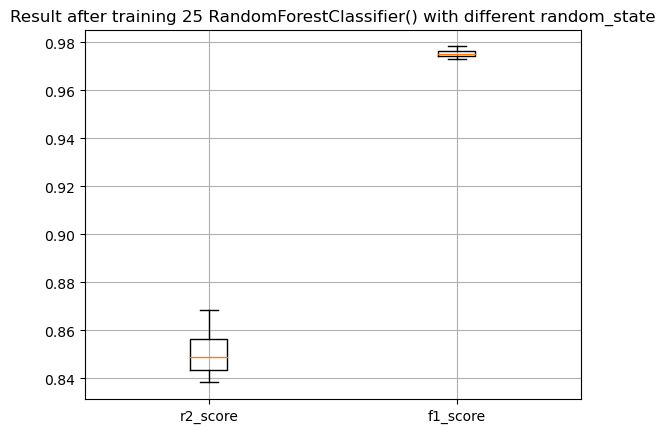

In [8]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()
value = multi_test(forest_model,n=25,random_start=42,test_size=0.15)

In [9]:
forest_model = RandomForestClassifier()
submit_forest = submission(forest_model,name_file="Submissions/forest_classifier_submission.csv")

Grid Search Progress: 100%|██████████| 15/15 [1:15:40<00:00, 302.72s/it]

RandomForestClassifier(criterion='log_loss', n_estimators=800, n_jobs=16,
                       random_state=42)


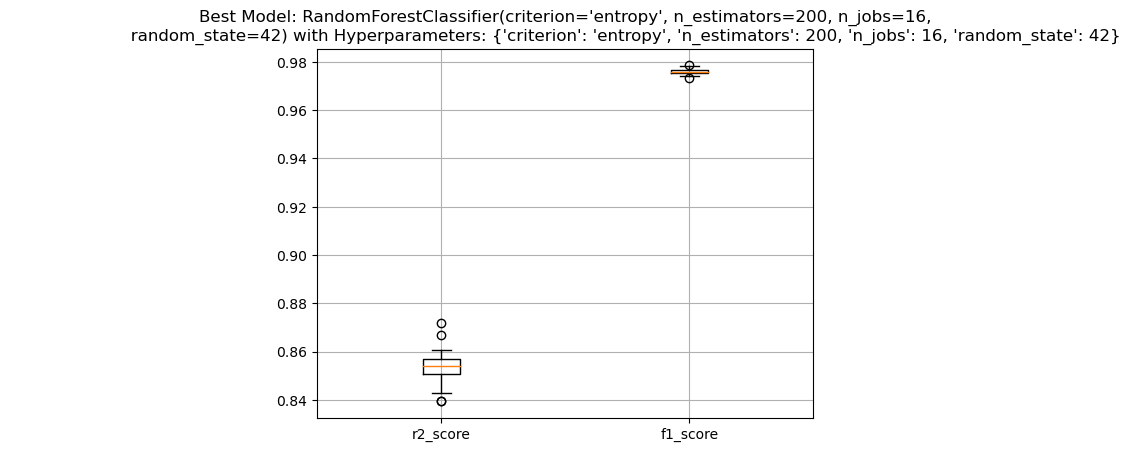

Best hyperparameters: {'criterion': 'entropy', 'n_estimators': 200, 'n_jobs': 16, 'random_state': 42}
Best score (f1_score): 0.9759464881424093


In [10]:
hyperparameters = {
    "criterion": [ "gini",'entropy','log_loss'],
    'n_estimators': [50, 100,200,400,800],
    #'max_depth': [20,50,100,200,400],
    "n_jobs":[nb_cpu],
    "random_state":[random_seed],
}

forest_model = RandomForestClassifier()

best_model_forest, best_params_forest, best_score_forest, all_results_forest = grid_search(
    forest_model, X, Y, hyperparameters, n=25, random_start= 42,
    saving_path="Archives_Model/Random_Forest/grid_best_model.joblib" ,display_boxplot=True)

In [11]:
submit_best_forest = submission(best_model_forest,name_file="Submissions/best_forest_classifier_submission.csv")

### Boosting 

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

random_seed = 42
param_grid = {
    "loss": [ 'log_loss','deviance'],
    'learning_rate': [0.01,0.1],
    'n_estimators': [100,250],
    'criterion':["friedman_mse",'squared_error'],
    'max_depth': [50,100,200],
    "n_iter_no_change" : [15],
    "random_state":[random_seed],
}

boosting_classif_model = GradientBoostingClassifier()

grid_search_CV = GridSearchCV(estimator=boosting_classif_model, param_grid=param_grid, scoring='f1',cv=4,verbose=2,n_jobs=nb_cpu)

grid_search_CV.fit(X, Y)
best_params_boost = grid_search_CV.best_params_
best_model_boost = grid_search_CV.best_estimator_

save_model(best_model_boost,path_to_save="Archives_Model/Boosting_Classificator/scikit_GDCV_best_model")

Fitting 4 folds for each of 48 candidates, totalling 192 fits


In [13]:
submit_best_scikit_GDCV_boosting = submission(best_model_boost,name_file="Submissions/best_scikit_GDCV_boosting_submission.csv")

Grid Search Progress: 100%|██████████| 36/36 [4:05:59<00:00, 409.98s/it]   


GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2,
                           max_depth=200, n_estimators=250, n_iter_no_change=15,
                           random_state=42)


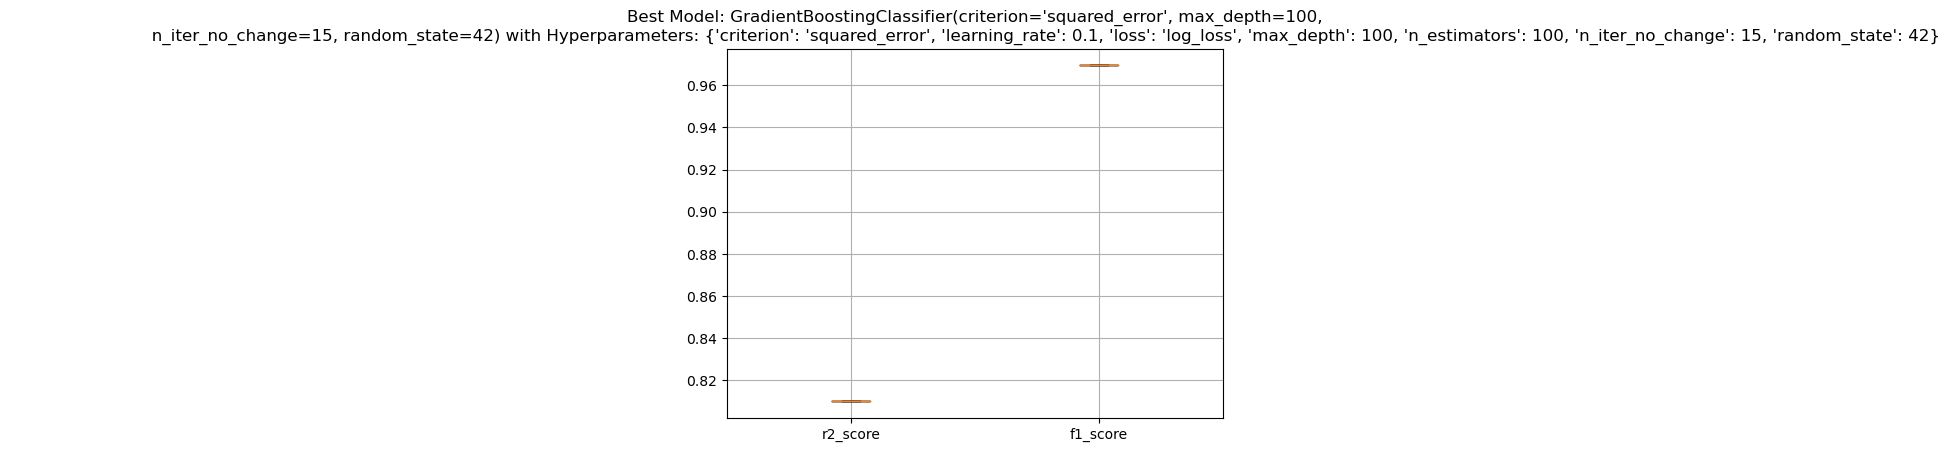

Best hyperparameters: {'criterion': 'squared_error', 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 100, 'n_estimators': 100, 'n_iter_no_change': 15, 'random_state': 42}
Best score (f1_score): 0.9695175352132512


In [14]:
from sklearn.ensemble import GradientBoostingClassifier

hyperparameters = {
    "loss": [ 'log_loss'],
    'learning_rate': [0.01,0.1,0.2],
    'n_estimators': [100,250],
    'criterion':["friedman_mse",'squared_error'],
    'max_depth': [50,100,200],
    "n_iter_no_change" : [15],
    "random_state": [random_seed], #control the randomness for each boosting
}

boosting_model = GradientBoostingClassifier()

best_model_boosting, best_params_boosting, best_score_boosting, all_results_boosting = grid_search(boosting_model,
                                                                                                    X, Y, hyperparameters, n=1, random_start= 42,
                                                                                                    saving_path="Archives_Model/Boosting_Classification/grid_best_model.joblib" ,display_boxplot=True)

In [15]:
submit_best_boosting = submission(best_model_boosting,name_file="Submissions/best_boosting_submission.csv")